# Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import os
import matplotlib.pyplot as plt 

In [2]:
# ======================
# CONFIG
# ======================
IMG = 128
BATCH = 32
EPOCHS = 80

BASE = os.getcwd()
DATA = os.path.join(BASE, "../data", "processed")
RAW = os.path.join(BASE, "../data", "structured")

In [3]:
# ======================
# DATA GENERATORS
# ======================
def preprocess(img):
    return img / 255.0

train_gen = ImageDataGenerator(
    preprocessing_function=preprocess,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True
)

In [4]:
val_gen = ImageDataGenerator(
    preprocessing_function=preprocess
)

In [5]:
train = train_gen.flow_from_directory(
    os.path.join(DATA, "train"),
    target_size=(IMG, IMG),
    batch_size=BATCH,
    class_mode="categorical"
)

Found 4651 images belonging to 28 classes.


In [6]:
valid = val_gen.flow_from_directory(
    os.path.join(DATA, "valid"),
    target_size=(IMG, IMG),
    batch_size=BATCH,
    class_mode="categorical",
    shuffle = False
)

Found 870 images belonging to 28 classes.


In [7]:
model = models.Sequential([

    layers.Conv2D(48, 3, padding="same", activation="relu",
                  input_shape=(IMG, IMG, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(96, 3, padding="same", activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(192, 3, padding="same", activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(256, 3, padding="same", activation="relu"),
    layers.BatchNormalization(),

    layers.Conv2D(256, 3, padding="same", activation="relu"),
    layers.BatchNormalization(),

    layers.GlobalAveragePooling2D(),

    layers.Dense(256, activation="relu"),
    layers.Dropout(0.3),

    layers.Dense(train.num_classes, activation="softmax")
])

c:\Users\20100\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# ======================
# OPTIMIZER + LR SCHEDULE
# ======================
steps_per_epoch = len(train) * EPOCHS

lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=3e-4,
    decay_steps=steps_per_epoch
)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [9]:
# ======================
# COMPILE
# ======================
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.03),
    metrics=["accuracy"]
)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 48)   │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 48)   │           192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 96)     │        41,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 192)    │       166,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 192)    │           768 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 192)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 256)    │       442,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 28)             │         7,196 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,318,076 (5.03 MB)

 Trainable params: 1,316,380 (5.02 MB)

 Non-trainable params: 1,696 (6.62 KB)

In [11]:
# ======================
# CALLBACKS
# ======================
callbacks = [
    EarlyStopping(
        monitor="val_loss",
        patience=10,
        restore_best_weights=True
    )
]

In [12]:
# ======================
# TRAIN
# ======================
history = model.fit(
    train,
    validation_data=valid,
    epochs=EPOCHS,
    callbacks=callbacks
)

c:\Users\20100\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/80
146/146 ━━━━━━━━━━━━━━━━━━━━ 85s 558ms/step - accuracy: 0.0613 - loss: 3.3512 - val_accuracy: 0.0333 - val_loss: 3.5195
Epoch 2/80
146/146 ━━━━━━━━━━━━━━━━━━━━ 71s 488ms/step - accuracy: 0.0975 - loss: 3.1463 - val_accuracy: 0.0368 - val_loss: 3.8691
Epoch 3/80
146/146 ━━━━━━━━━━━━━━━━━━━━ 72s 491ms/step - accuracy: 0.1259 - loss: 3.0051 - val_accuracy: 0.0862 - val_loss: 3.2388
Epoch 4/80
146/146 ━━━━━━━━━━━━━━━━━━━━ 72s 490ms/step - accuracy: 0.1771 - loss: 2.8300 - val_accuracy: 0.0966 - val_loss: 3.2145
Epoch 5/80
146/146 ━━━━━━━━━━━━━━━━━━━━ 77s 525ms/step - accuracy: 0.1952 - loss: 2.7005 - val_accuracy: 0.0954 - val_loss: 3.7737
Epoch 6/80
146/146 ━━━━━━━━━━━━━━━━━━━━ 76s 519ms/step - accuracy: 0.2410 - loss: 2.5462 - val_accuracy: 0.1126 - val_loss: 3.4532
Epoch 7/80
146/146 ━━━━━━━━━━━━━━━━━━━━ 72s 489ms/step - accuracy: 0.2987 - loss: 2.3280 - val_accuracy: 0.2011 - val_loss: 2.7675
Epoch 8/80
146/146 ━━━━━━━━━━━━━━━━━━━━ 70s 482ms/step - accuracy: 0.3795 - loss: 2

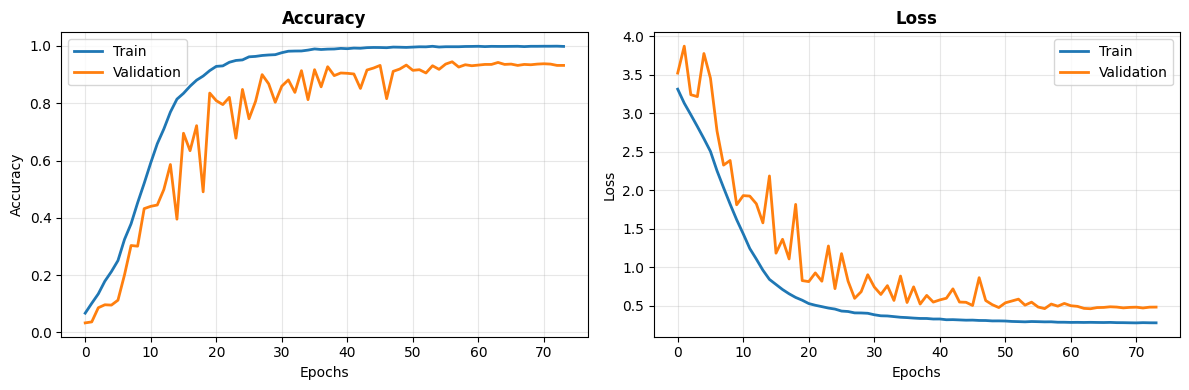

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))

# Accuracy
ax[0].plot(history.history["accuracy"], label="Train", linewidth=2)
ax[0].plot(history.history["val_accuracy"], label="Validation", linewidth=2)
ax[0].set_title("Accuracy", fontweight="bold")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
ax[0].legend()
ax[0].grid(alpha=0.3)

# Loss
ax[1].plot(history.history["loss"], label="Train", linewidth=2)
ax[1].plot(history.history["val_loss"], label="Validation", linewidth=2)
ax[1].set_title("Loss", fontweight="bold")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
ax[1].legend()
ax[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


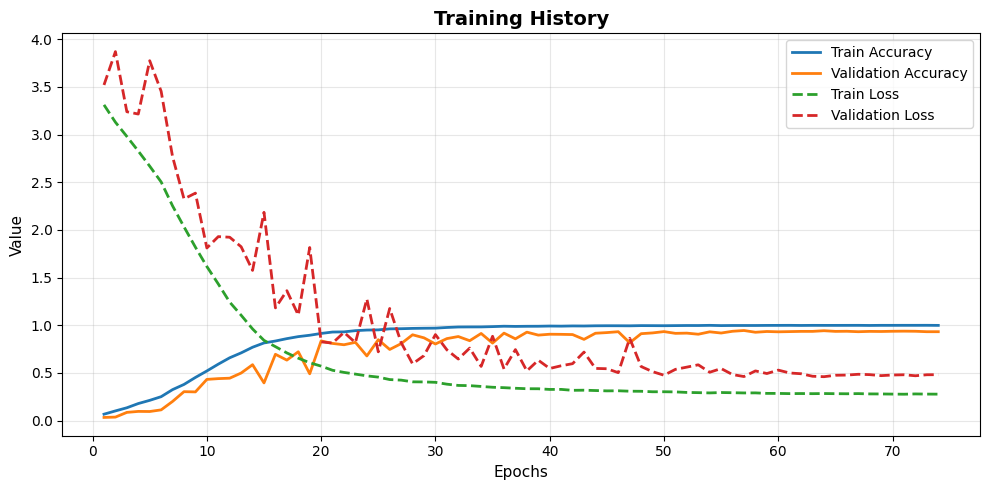

In [16]:
plt.figure(figsize=(10,5))

epochs = range(1, len(history.history["accuracy"]) + 1)

plt.plot(epochs, history.history["accuracy"], 
         label="Train Accuracy", linewidth=2)
plt.plot(epochs, history.history["val_accuracy"], 
         label="Validation Accuracy", linewidth=2)

plt.plot(epochs, history.history["loss"], 
         label="Train Loss", linestyle="--", linewidth=2)
plt.plot(epochs, history.history["val_loss"], 
         label="Validation Loss", linestyle="--", linewidth=2)

plt.xlabel("Epochs", fontsize=11)
plt.ylabel("Value", fontsize=11)
plt.title("Training History", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [14]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess)

test = test_gen.flow_from_directory(
    os.path.join(RAW, "test_structured"),
    target_size=(IMG, IMG),
    batch_size=BATCH,
    class_mode="categorical",
)

model.evaluate(test)

Found 290 images belonging to 28 classes.
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.9244 - loss: 0.5771 


[0.5755839943885803, 0.9275861978530884]

In [15]:
MODELS_PATH = os.path.join(BASE, "../models", "ArSL_Model_v3_NoCrop_NewArch.keras")
model.save(MODELS_PATH)